# Social Media Sentiment Analysis

## Project Overview
This project involves analyzing social media sentiment from a dataset containing comments from various platforms (Twitter, Instagram, Facebook). The goal is to understand public sentiment towards specific topics, products, or events using natural language processing (NLP) techniques.

## Dataset:
The dataset includes 732 entries with the following columns:

<li><b>Text:</b> The content of the social media comment.
<li><b>Sentiment:</b>The sentiment label associated with the comment.
<li><b>Timestamp:</b> The date and time of the comment.
<li><b>User:</b> The user who posted the comment.
<li><b>Platform:</b> The social media platform (Twitter, Instagram, Facebook).
<li><b>Hashtags:</b> The hashtags used in the comment.
<li><b>Retweets:</b> Number of retweets (for Twitter).
<li><b>Likes:</b> Number of likes.
<li><b>Country:</b> The country of the user.
<li><b>Year, Month, Day, Hour:</b> Date and time details.

#### Step 1: Read the dataset

In [1]:
# Import necessary libraries
import pandas as pd
# Load the dataset
# Replace 'your_dataset.csv' with the actual file name or path of your dataset
df = pd.read_csv('sentimentdataset.csv')

In [2]:
# Display the first few rows of the dataset to understand its structure
print("Dataset Preview:")
display(df.head())

Dataset Preview:


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [4]:
# Get basic information about the dataset (column names, data types, missing values)
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [6]:
# Check for missing values in each column
print("\nMissing Values in Dataset:")
print(df.isnull().sum())


Missing Values in Dataset:
Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64


In [8]:
# Get a summary of numerical columns
print("\nStatistical Summary of Numerical Columns:")
display(df.describe())


Statistical Summary of Numerical Columns:


,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [10]:
# Get the unique platforms if available (e.g., Twitter, Facebook, etc.)
if 'Platform' in df.columns:
    print("\nUnique Platforms in the Dataset:")
    print(df['Platform'].unique())
else:
    print("\nNo 'Platform' column found in the dataset.")


Unique Platforms in the Dataset:
[' Twitter  ' ' Instagram ' ' Facebook ' ' Twitter ']


#### Step 2: Data Cleaning
Removed extra spaces and cleaned sentiment labels to standardize them into three categories: Positive, Negative, and Neutral.

In [12]:
# Drop the unnecessary columns
df_cleaned = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

# Remove leading/trailing spaces from 'Platform' column
df_cleaned['Platform'] = df_cleaned['Platform'].str.strip()

# Verify the changes
print("Cleaned Unique Platforms in the Dataset:")
print(df_cleaned['Platform'].unique())

# Display the first few rows of the cleaned dataset
display(df_cleaned.head())


Cleaned Unique Platforms in the Dataset:
['Twitter' 'Instagram' 'Facebook']


,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


#### Step 3: Text Preprocessing

##### Applied text preprocessing using spaCy:
<li>Converted text to lowercase.
<li>Removed URLs, special characters, and numbers.
<li>Tokenized text and removed stopwords.
<li>Lemmatized words to reduce them to their base form.

In [28]:
!pip install spacy
!python -m spacy download en_core_web_sm


  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/9d/0e/fe7fcae4e14b82fe8feefb7be2cd76f880d5e994ce5c1c159a47b89fd2cc/spacy-3.7.6-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-legacy<3.1.0,>=3.0.11 from https://files.pythonhosted.org/packages/c3/55/12e842c70ff8828e34e543a2c7176dac4da006ca6901c9e8b43efab8bc6b/spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/c1/c3/dd

In [30]:
import spacy

# Load spaCy's English model
nlp = spacy.load('en_core_web_sm')

# Function to preprocess text using spaCy
def preprocess_text_spacy(text):
    # Process text with spaCy
    doc = nlp(text.lower())
    # Remove stopwords, punctuation, and lemmatize tokens
    words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(words)

# Apply the preprocessing to the 'Text' column
df_cleaned['Cleaned_Text'] = df_cleaned['Text'].apply(preprocess_text_spacy)

# Display the cleaned text data
print("Sample of Cleaned Text Data (spaCy):")
display(df_cleaned[['Text', 'Cleaned_Text']].head())


Sample of Cleaned Text Data (spaCy):


,Text,Cleaned_Text
0,Enjoying a beautiful day at the park! ...,enjoy beautiful day park
1,Traffic was terrible this morning. ...,traffic terrible morning
2,Just finished an amazing workout! 💪 ...,finish amazing workout 💪
3,Excited about the upcoming weekend getaway! ...,excited upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,try new recipe dinner tonight


#### Step 4: Sentiment Mapping

Mapped various sentiment labels to three main categories for simplified analysis.

In [36]:
print(df_cleaned['Sentiment'].unique())

[' Positive  ' ' Negative  ' ' Neutral   ' ' Anger        '
 ' Fear         ' ' Sadness      ' ' Disgust      ' ' Happiness    '
 ' Joy          ' ' Love         ' ' Amusement    ' ' Enjoyment    '
 ' Admiration   ' ' Affection    ' ' Awe          ' ' Disappointed '
 ' Surprise     ' ' Acceptance   ' ' Adoration    ' ' Anticipation '
 ' Bitter       ' ' Calmness     ' ' Confusion    ' ' Excitement   '
 ' Kind         ' ' Pride        ' ' Shame        ' ' Confusion '
 ' Excitement ' ' Shame ' ' Elation       ' ' Euphoria      '
 ' Contentment   ' ' Serenity      ' ' Gratitude     ' ' Hope          '
 ' Empowerment   ' ' Compassion    ' ' Tenderness    ' ' Arousal       '
 ' Enthusiasm    ' ' Fulfillment  ' ' Reverence     ' ' Compassion'
 ' Fulfillment   ' ' Reverence ' ' Elation   ' ' Despair         '
 ' Grief           ' ' Loneliness      ' ' Jealousy        '
 ' Resentment      ' ' Frustration     ' ' Boredom         '
 ' Anxiety         ' ' Intimidation    ' ' Helplessness    '
 ' 

In [38]:
# Define a mapping dictionary to consolidate sentiments
sentiment_mapping = {
    'Positive': ['positive', 'joy', 'happiness', 'euphoria', 'gratitude', 'pride', 'excited', 'admiration', 'anticipation', 'hope', 'enthusiasm', 'affection', 'love', 'amusement'],
    'Negative': ['negative', 'anger', 'fear', 'sadness', 'disgust', 'frustration', 'loneliness', 'grief', 'regret', 'betrayal', 'resentment', 'despair', 'jealousy', 'anxiety'],
    'Neutral': ['neutral', 'calmness', 'confusion', 'serenity', 'acceptance', 'indifference']
}

# Function to map the sentiment column to broader categories
def map_sentiment(sentiment):
    sentiment_lower = sentiment.strip().lower()  # Normalize text
    for category, sentiments in sentiment_mapping.items():
        if any(s in sentiment_lower for s in sentiments):
            return category
    return 'Neutral'  # Default to Neutral if no match

# Apply the sentiment mapping function to the 'Sentiment' column
df_cleaned['Mapped_Sentiment'] = df_cleaned['Sentiment'].apply(map_sentiment)

# Check the new mapped sentiment values
print(df_cleaned['Mapped_Sentiment'].unique())


['Positive' 'Negative' 'Neutral']


#### Step 5: Data Visualization

<b>Sentiment Distribution Across Platforms:</b> Visualized how sentiments are distributed across different social media platforms.

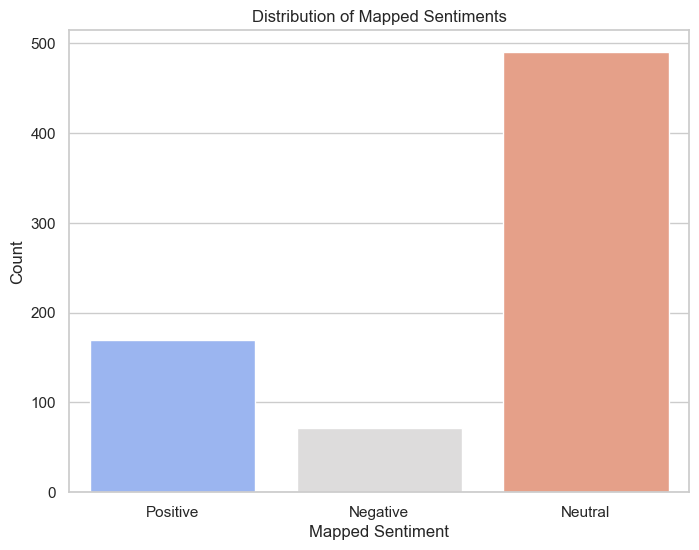

In [40]:
# Plot the distribution of the new mapped sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='Mapped_Sentiment', data=df_cleaned, palette='coolwarm')
plt.title('Distribution of Mapped Sentiments')
plt.xlabel('Mapped Sentiment')
plt.ylabel('Count')
plt.show()


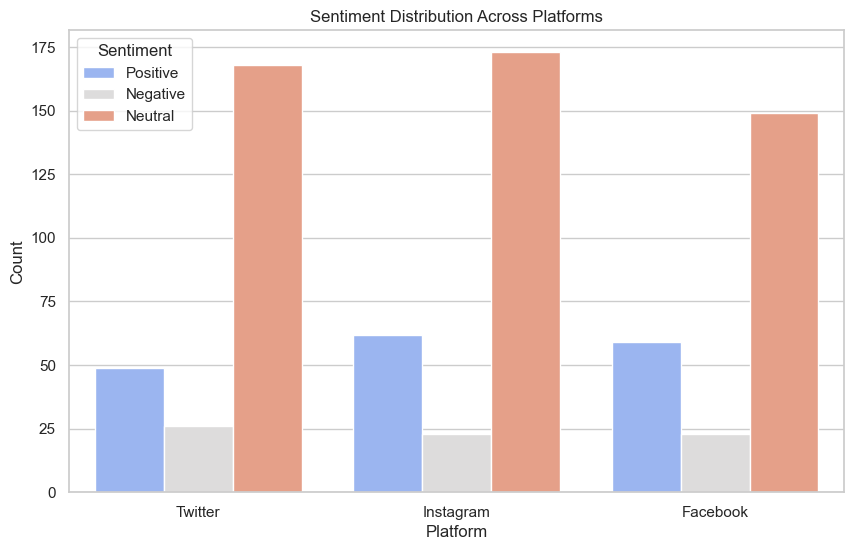

In [42]:
# Plot sentiment distribution across platforms
plt.figure(figsize=(10, 6))
sns.countplot(x='Platform', hue='Mapped_Sentiment', data=df_cleaned, palette='coolwarm')
plt.title('Sentiment Distribution Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()


<b>Sentiment Trends Over Time:</b> Analyzed sentiment trends over time (by year and month).

<Figure size 1200x600 with 0 Axes>

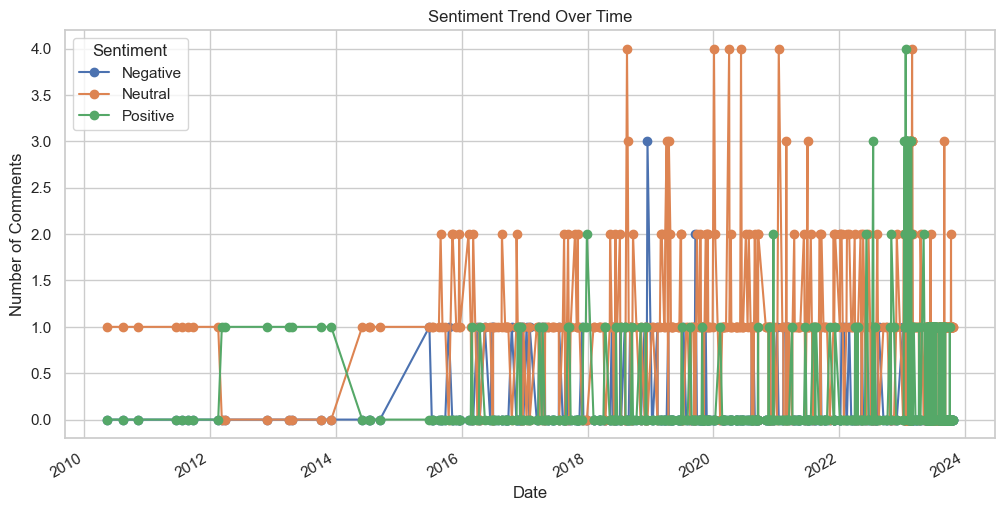

In [44]:
# Sentiment trend over time (by Year and Month)
df_cleaned['Date'] = pd.to_datetime(df_cleaned[['Year', 'Month', 'Day']])

# Group by Date and Sentiment
sentiment_trends = df_cleaned.groupby(['Date', 'Mapped_Sentiment']).size().unstack(fill_value=0)

# Plot the trend
plt.figure(figsize=(12, 6))
sentiment_trends.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.legend(title='Sentiment')
plt.show()


In [50]:
# Remove leading/trailing spaces from 'Platform' column
df_cleaned['Country'] = df_cleaned['Country'].str.strip()

# Verify the changes
print("Cleaned Unique Countries in the Dataset:")
print(df_cleaned['Country'].unique())

Cleaned Unique Countries in the Dataset:
['USA' 'Canada' 'UK' 'Australia' 'India' 'France' 'Brazil' 'Japan'
 'Greece' 'Germany' 'Sweden' 'Italy' 'Netherlands' 'South Africa' 'Spain'
 'Portugal' 'Switzerland' 'Austria' 'Belgium' 'Denmark' 'Czech Republic'
 'Jordan' 'Peru' 'Maldives' 'China' 'Cambodia' 'Norway' 'Colombia'
 'Ireland' 'Jamaica' 'Kenya' 'Scotland' 'Thailand']


<b>Sentiment Analysis by Country: </b>Examined sentiment distribution across different countries.

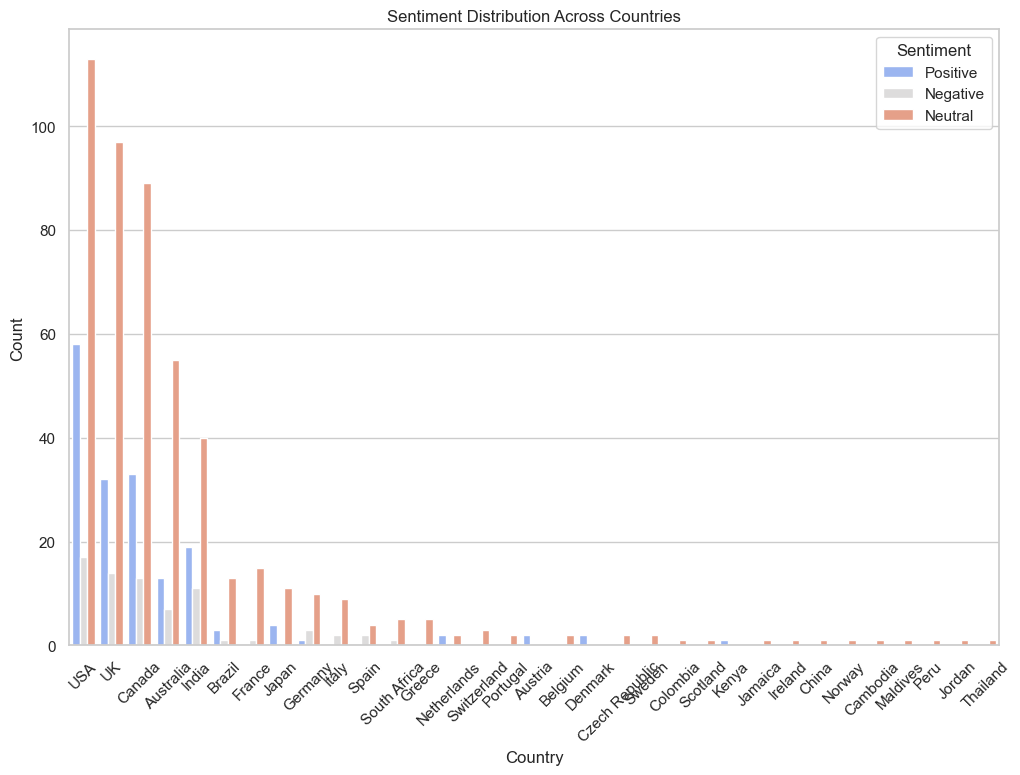

In [52]:
# Plot sentiment distribution across countries
plt.figure(figsize=(12, 8))
sns.countplot(x='Country', hue='Mapped_Sentiment', data=df_cleaned, palette='coolwarm', order=df_cleaned['Country'].value_counts().index)
plt.title('Sentiment Distribution Across Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()
